In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = '/Users/ArvindRamachadran/Dropbox (ASU)/power-laws-forecasting-energy-data/'

In [3]:
df_holidays = pd.read_csv(data_path+'power-laws-forecasting-energy-consumption-holidays.csv', delimiter=';')
df_holidays['count'] =1

In [4]:
df_energy_consumption = pd.read_csv(data_path+'power-laws-forecasting-energy-consumption-training-data.csv', delimiter=';')
df_energy_consumption['count']=1

In [5]:
df_weather_data = pd.read_csv(data_path+'power-laws-forecasting-energy-consumption-weather.csv', delimiter=';')
df_weather_data['count']=1

In [6]:
df_meta_data = pd.read_csv(data_path+'power-laws-forecasting-energy-consumption-metadata.csv',delimiter=";")
df_meta_data['count']=1

In [7]:
df_test_data = pd.read_csv(data_path+'power-laws-forecasting-energy-consumption-test-data.csv',delimiter=";")

In [8]:
df_submission = pd.read_csv(data_path+'power-laws-forecasting-energy-consumption-submission-forecast-period.csv',delimiter=";")

In [9]:
df_weather_data['Timestamp'] = pd.to_datetime(df_weather_data['Timestamp'])

In [10]:
df_energy_consumption['Timestamp'] = pd.to_datetime(df_energy_consumption['Timestamp'])

In [11]:
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'])

In [12]:
#df_weather_data['Timestamp'].sort_values() 

In [13]:
#df_energy_consumption['Timestamp'].sort_values()

In [14]:
df_energy_consumption_site_grouped = df_energy_consumption.groupby(['SiteId'])
df_meta_data_site_grouped = df_meta_data.groupby(['SiteId'])
df_weather_data_site_grouped = df_weather_data.groupby(['SiteId'])

In [15]:
#df_energy_consumption_site_grouped.count()['count'].sort_values(ascending=False).head(15)

In [16]:
#df_weather_data_site_grouped.count()['count'].sort_values(ascending=False).head(15)

In [17]:
#df_weather_data.loc[df_weather_data['SiteId']==6]

In [18]:
site_max_energy = df_energy_consumption_site_grouped.mean()['Value'].idxmax()

In [19]:
site_max_weather_data = df_weather_data_site_grouped.count()['count'].idxmax()

In [20]:
Site_list = list(df_energy_consumption_site_grouped.count().index)

In [21]:
Total_energy_consumed = list(df_energy_consumption_site_grouped.sum().sort_index()['Value'])

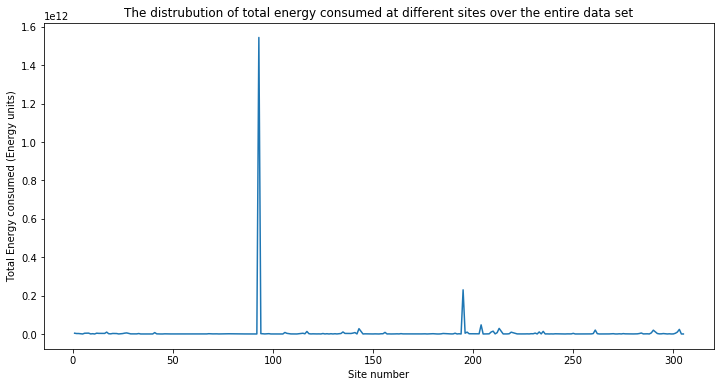

In [22]:
fig_1 = plt.figure(figsize=(12,6))
ax = fig_1.add_subplot(111)
ax.plot(Site_list, Total_energy_consumed)
ax.set_xlabel('Site number')
ax.set_ylabel('Total Energy consumed (Energy units)')
ax.set_title('The distrubution of total energy consumed at different sites over the entire data set')
plt.savefig('./Assets/Energy-consumption-site-distribution.pdf')

In [23]:
sorted_mean_surface = list(df_meta_data_site_grouped.mean().sort_index()['Surface'])

Text(0, 0.5, 'Total Energy consumed (Energy units)')

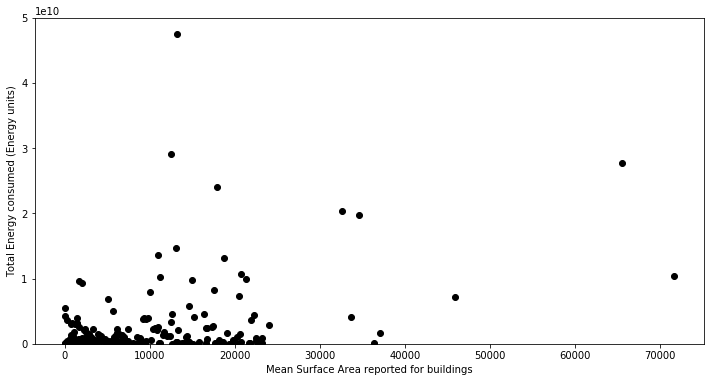

In [29]:
fig_2 = plt.figure(figsize=(12,6))
ax = fig_2.add_subplot(111)
ax.plot(sorted_mean_surface, Total_energy_consumed, 'ko')
ax.set_ylim(0,5e10)
ax.set_xlabel('Mean Surface Area reported for buildings')
ax.set_ylabel('Total Energy consumed (Energy units)')
ax.set_title('The distrubution of total energy consumed and surface area of buildings ')
plt.savefig('./Assets/Energy-bdistribution.pdf')

In [ ]:
Sample_weather_data = df_weather_data.loc[(df_weather_data['SiteId']==6)
&(df_weather_data['Timestamp'].dt.day >=1)&(df_weather_data['Timestamp'].dt.day <=17)
&(df_weather_data['Timestamp'].dt.month == 9)&(df_weather_data['Timestamp'].dt.year == 2017)]

In [ ]:
#plt.figure(figsize=(12,6))
#plt.plot(Sample_weather_data['Timestamp'], Sample_weather_data['Temperature'], 'ko')

In [ ]:
Sample_energy_data = df_energy_consumption.loc[(df_energy_consumption['SiteId']==6)
&(df_energy_consumption['Timestamp'].dt.day >=1)&(df_energy_consumption['Timestamp'].dt.day<=17)
&(df_energy_consumption['Timestamp'].dt.month == 9)&(df_energy_consumption['Timestamp'].dt.year == 2017)]

In [ ]:
fig_3 = plt.figure(figsize=(12,6))
ax = fig_3.add_subplot(111)
ax_twin = ax.twinx()
ax.plot(Sample_energy_data['Timestamp'], Sample_energy_data['Value'], 'bo', label='Energy consumed at Site')
ax_twin.plot(Sample_weather_data['Timestamp'], Sample_weather_data['Temperature'], 'ro', label='Temperature at Site')
ax.set_xlabel('Days')
ax.set_ylabel('Energy consumed (Energy units)')
ax_twin.set_ylabel(r'Temperature ($^{\circ} C$)')
ax.set_title('A comparison of trends in energy consumption and weather in Site 6 in September 2017')
ax.legend()
ax_twin.legend()
plt.savefig('./Assets/Energy-vs-temperature.pdf')